In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# настройка вида вывода
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

# данные о велосипедистах в Монреале
df = pd.read_csv("data-3.csv", encoding = 'latin1', parse_dates = ['Date'], dayfirst = True, index_col = 'Date')

df.head()

,Berri 1,Brï¿½beuf (donnï¿½es non disponibles),Cï¿½te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donnï¿½es non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


<AxesSubplot:xlabel='Date'>

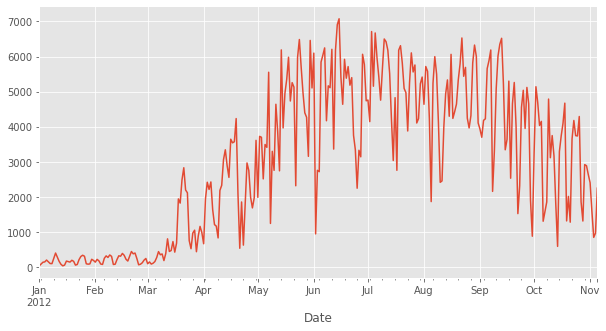

In [17]:
df['Berri 1'].plot() # отображение дорожки Berri 1

In [18]:
berriBikes = df[['Berri 1']].copy() # копирование выбранной дорожки в новый датафрейм

berriBikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [19]:
berriBikes.loc[:,'weekday'] = berriBikes.index.weekday # добавление номера дня недели, где 0 - понедельник

berriBikes.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [20]:
weekdayCounts = berriBikes.groupby('weekday').aggregate(sum) # группировка строки по дню недели и затем сложение всех значений с одинаковым днём недели
weekdayCounts.index = ["пн", "вт", "ср", "чт", "пт", "сб", "вс"] # переименовывание дней недели

weekdayCounts

,Berri 1
пн,134298
вт,135305
ср,152972
чт,160131
пт,141771
сб,101578
вс,99310


<AxesSubplot:>

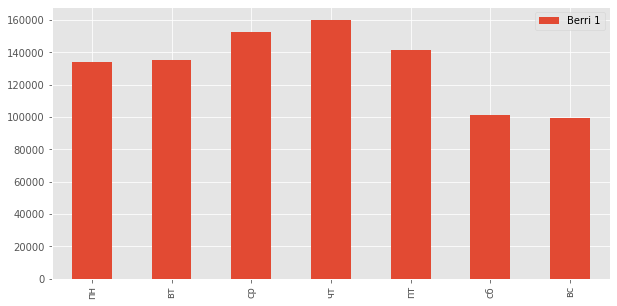

In [21]:
weekdayCounts.plot(kind = 'bar') # визуализация полученных результатов